In [230]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Flatten
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from keras import backend as K 
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant
from sklearn.cluster import KMeans
from keras.optimizers import RMSprop
from keras.utils import to_categorical

In [231]:
data=pd.read_csv("Heart_Disease_Data.csv",na_values="?")
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [233]:
cleaned_data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
cleaned_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<ipython-input-234-2f0f0914e239>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


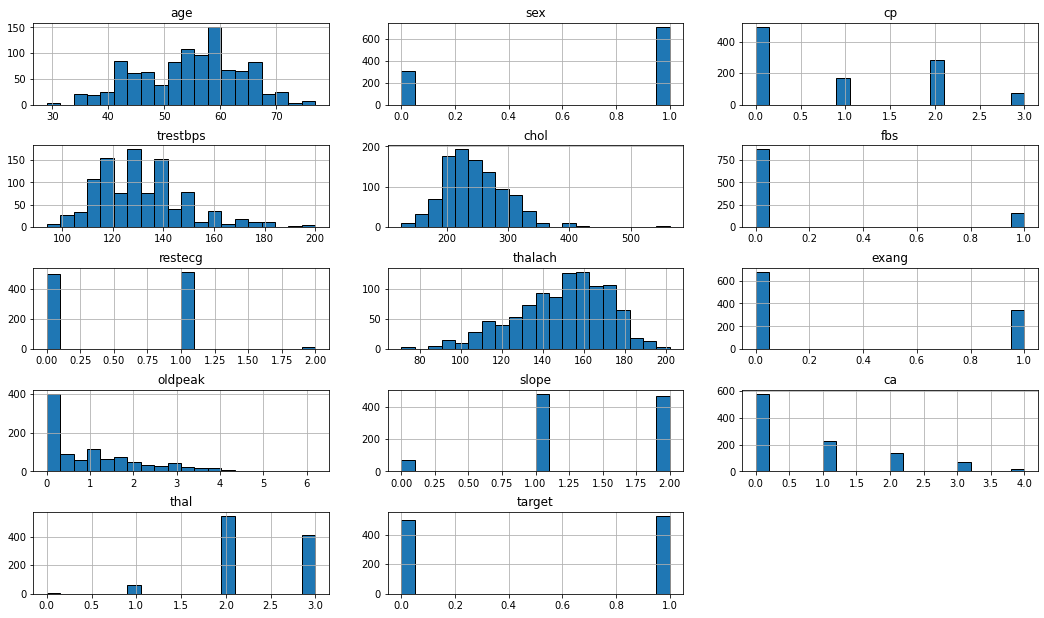

In [234]:
columns=cleaned_data.columns[:14]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    cleaned_data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<ipython-input-235-6ee09b29bb0b>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


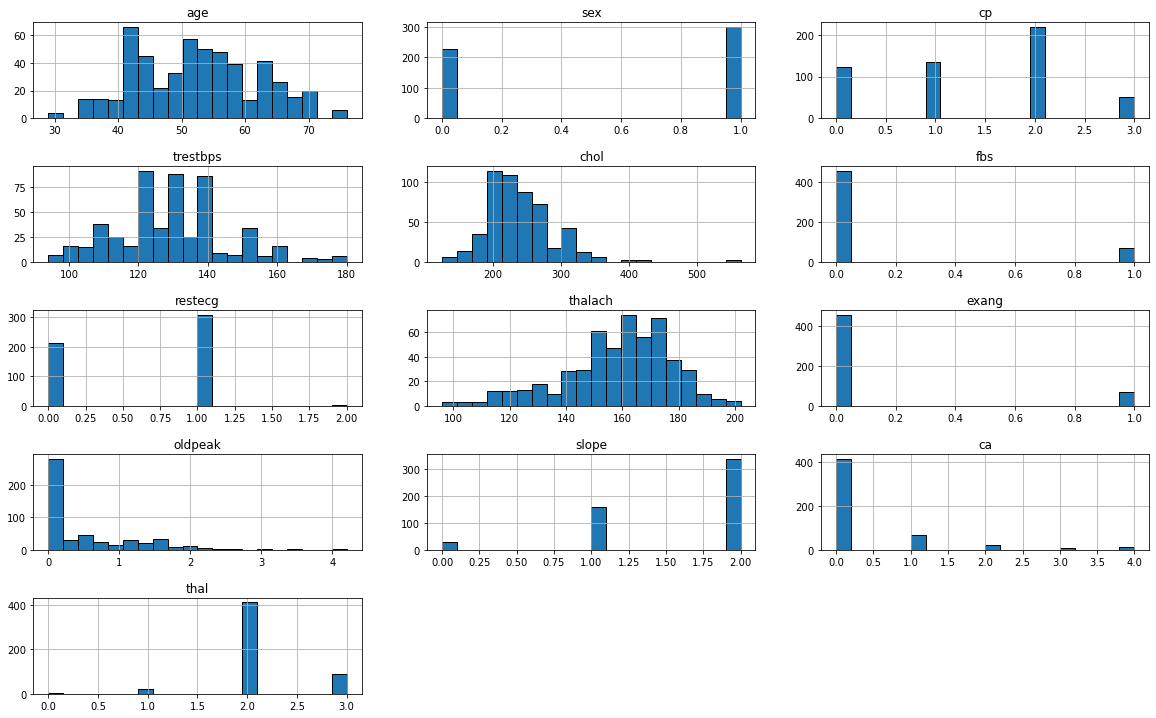

In [235]:
# Heart Disease Patients
dataset_copy=data[data['target']==1]
columns=data.columns[:13]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset_copy[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

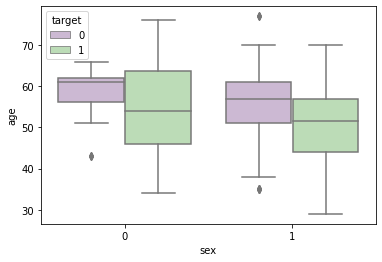

In [236]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x=cleaned_data.sex, y=cleaned_data.age, hue=cleaned_data.target, data=cleaned_data, palette="PRGn")
plt.show()

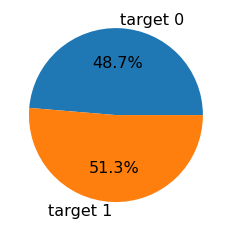

In [237]:
plt.pie(cleaned_data.groupby("target").size().values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1, textprops = {"fontsize" : 16}) 
plt.show()

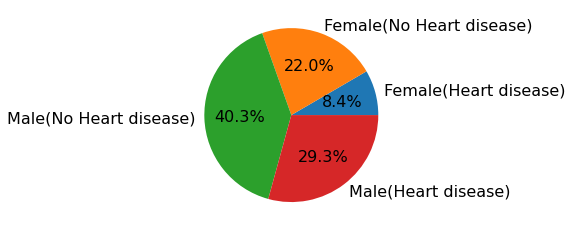

In [238]:
plt.pie(cleaned_data.groupby(["sex","target"]).size(), labels = ["Female(Heart disease)", "Female(No Heart disease)", "Male(No Heart disease)", "Male(Heart disease)"],autopct='%1.1f%%',radius = 1, textprops = {"fontsize" : 16})
plt.show()

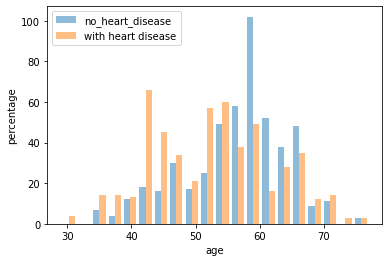

In [239]:
plt.hist([cleaned_data[cleaned_data.target==0].age, cleaned_data[cleaned_data.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

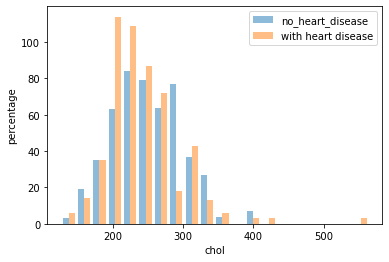

In [240]:
plt.hist([cleaned_data[cleaned_data.target==0].chol, cleaned_data[cleaned_data.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

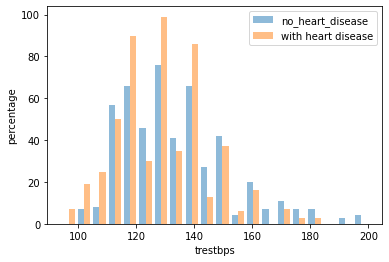

In [241]:
plt.hist([cleaned_data[cleaned_data.target==0].trestbps, cleaned_data[cleaned_data.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

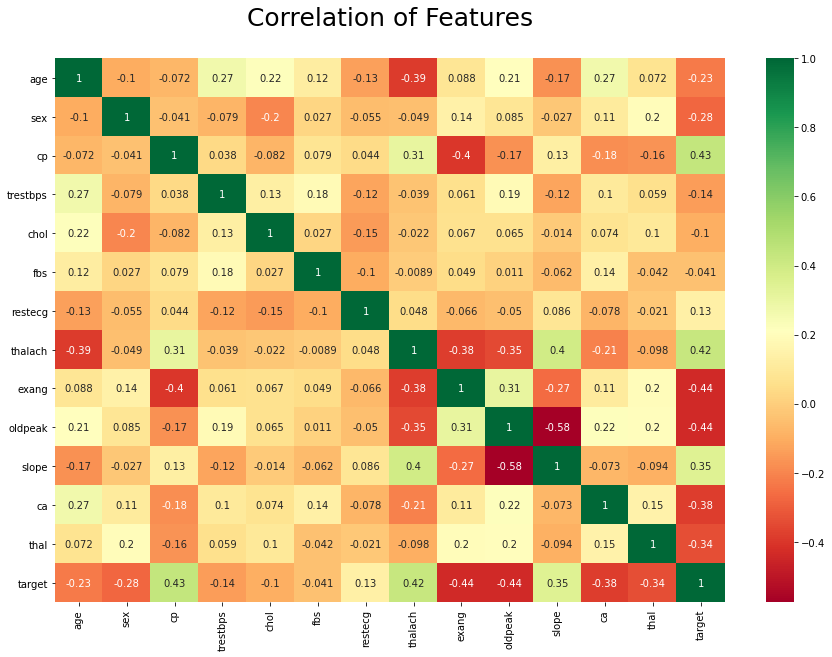

In [242]:
sns.heatmap(cleaned_data[cleaned_data.columns[:14]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Correlation of Features', y=1.05, size=25)
plt.show()

In [70]:
y = cleaned_data.target
x = cleaned_data.drop("target", axis=1)
scale = StandardScaler()
standardised_x = scale.fit_transform(x)
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [243]:
raw_x_train,raw_x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =  30)
standardised_x_train = scale.fit_transform(raw_x_train)
standardised_x_test = scale.fit_transform(raw_x_test)


In [246]:
def plotTrainHistory(history,model):
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.title('Model Accuracy ' + model)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.title('Model Loss '+ model)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [249]:
def SingleLayerPerceptron(x_train,x_test,y_train,y_test):
    # define the keras model
    SLP_Model = Sequential()

    SLP_Model.add(Dense(1,input_dim=13, activation='sigmoid'))

    # compile the keras model
    SLP_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    history = SLP_Model.fit(x_train, y_train, epochs=60, batch_size=10, verbose = False,validation_data=(x_test,y_test))
    # make class predictions with the model

    result = SLP_Model.predict(x_test)
    result = result > .5
    print("Model Summary")
    print(SLP_Model.summary())
    print("Confusion Matrix")
    print(confusion_matrix(y_test,result))
    print("Classification Report")
    display(pd.DataFrame(classification_report(y_test,result,output_dict=True)).transpose())
    plotTrainHistory(history,'SLP_Model')

Model Summary
Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[81 22]
 [ 6 96]]
Classification Report


,precision,recall,f1-score,support
0,0.931034,0.786408,0.852632,103.000000
1,0.813559,0.941176,0.872727,102.000000
accuracy,0.863415,0.863415,0.863415,0.863415
macro avg,0.872297,0.863792,0.862679,205.000000
weighted avg,0.872583,0.863415,0.862630,205.000000


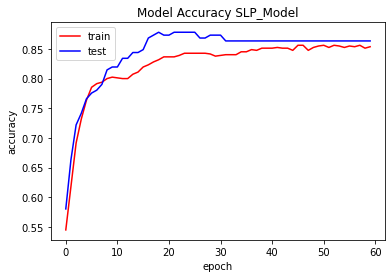

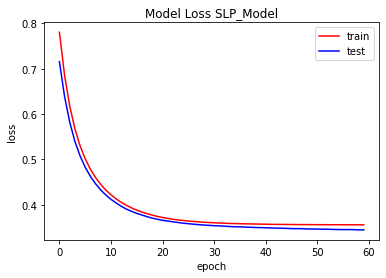

Model Summary
Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[84 19]
 [16 86]]
Classification Report


,precision,recall,f1-score,support
0,0.840000,0.815534,0.827586,103.000000
1,0.819048,0.843137,0.830918,102.000000
accuracy,0.829268,0.829268,0.829268,0.829268
macro avg,0.829524,0.829336,0.829252,205.000000
weighted avg,0.829575,0.829268,0.829244,205.000000


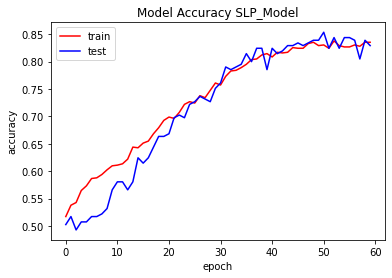

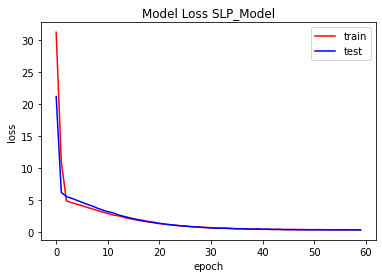

In [250]:
SingleLayerPerceptron(standardised_x_train,standardised_x_test,y_train,y_test)
SingleLayerPerceptron(raw_x_train,raw_x_test,y_train,y_test)

In [251]:
# MLP with single hidden layer

def MultiLayerPerceptronSingleHiddenLayer(x_train,x_test,y_train,y_test):
    # define the keras model
    MLP_model = Sequential()

    MLP_model.add(Dense(14, input_dim=13, activation='relu'))
    MLP_model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    MLP_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    history = MLP_model.fit(x_train, y_train, epochs=300, batch_size=10,validation_data=(x_test,y_test), verbose = False)
    # make class predictions with the model
    result = MLP_model.predict(x_test)
    result = result > .5
    print("Model Summary")
    print(MLP_model.summary())
    print("Confusion Matrix")
    print(confusion_matrix(y_test,result))
    print("Classification Report")
    print(classification_report(y_test,result))
    plotTrainHistory(history,'MLP_model')

Model Summary
Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 14)                196       
_________________________________________________________________
dense_198 (Dense)            (None, 1)                 15        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[103   0]
 [  0 102]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



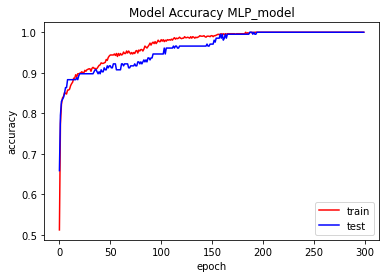

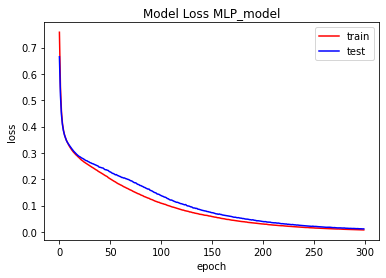

Model Summary
Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 14)                196       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 15        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[77 26]
 [ 4 98]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       103
           1       0.79      0.96      0.87       102

    accuracy                           0.85       205
   macro avg       0.87      0.85      0.85       205
weighted avg       0.87      0.85      0.85       205



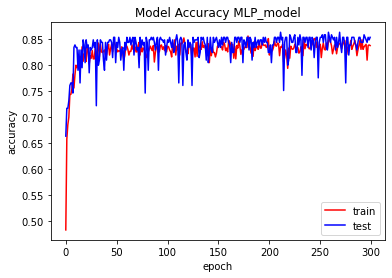

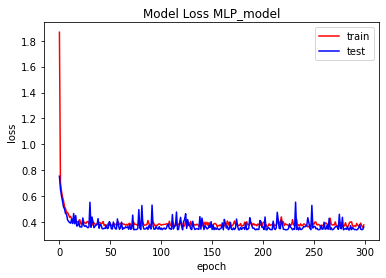

In [252]:
MultiLayerPerceptronSingleHiddenLayer(standardised_x_train,standardised_x_test,y_train,y_test)
MultiLayerPerceptronSingleHiddenLayer(raw_x_train,raw_x_test,y_train,y_test)

In [253]:
# MLP with 2 hidden layers

def MultiLayerPerceptronTwoHiddenLayer(x_train,x_test,y_train,y_test):
    # define the keras model
    MLP_model = Sequential()

    MLP_model.add(Dense(14, input_dim=13, activation='relu'))
    MLP_model.add(Dense(7, activation='relu'))
    MLP_model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    MLP_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    history = MLP_model.fit(x_train, y_train, epochs=150, batch_size=10,validation_data=(x_test,y_test), verbose = False)
    # make class predictions with the model
    result = MLP_model.predict(x_test)
    result = result > .5
    print("Model Summary")
    print(MLP_model.summary())
    print("Confusion Matrix")
    print(confusion_matrix(y_test,result))
    print("Classification Report")
    display(pd.DataFrame(classification_report(y_test,result,output_dict=True)).transpose())
    plotTrainHistory(history,'MLP_model')

Model Summary
Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 14)                196       
_________________________________________________________________
dense_202 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 8         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[103   0]
 [  0 102]]
Classification Report


,precision,recall,f1-score,support
0,1.0,1.0,1.0,103.0
1,1.0,1.0,1.0,102.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,205.0
weighted avg,1.0,1.0,1.0,205.0


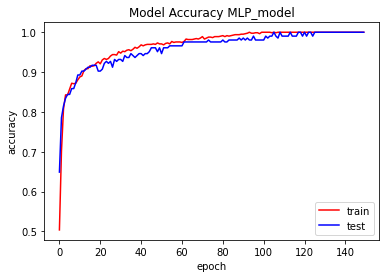

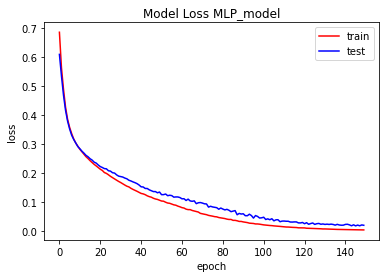

Model Summary
Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 14)                196       
_________________________________________________________________
dense_205 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_206 (Dense)            (None, 1)                 8         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[100   3]
 [ 43  59]]
Classification Report


,precision,recall,f1-score,support
0,0.699301,0.970874,0.813008,103.00000
1,0.951613,0.578431,0.719512,102.00000
accuracy,0.775610,0.775610,0.775610,0.77561
macro avg,0.825457,0.774653,0.766260,205.00000
weighted avg,0.824841,0.775610,0.766488,205.00000


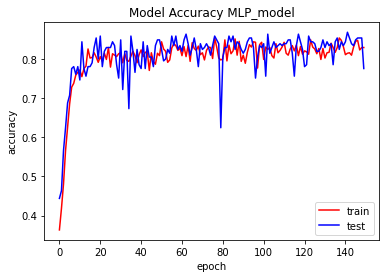

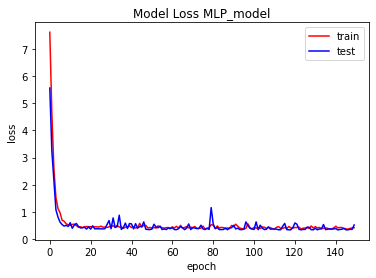

In [254]:
MultiLayerPerceptronTwoHiddenLayer(standardised_x_train,standardised_x_test,y_train,y_test)
MultiLayerPerceptronTwoHiddenLayer(raw_x_train,raw_x_test,y_train,y_test)

In [255]:
###### RBF prediction  

###### RBF Layer class and initializer 
class InitCentersKMeans(Initializer):
  
    def __init__(self, X, max_iter=200):
        self.X = X
        self.max_iter = max_iter
    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_
class InitCentersRandom(Initializer):
    
    def __init__(self, X):
        self.X = X
    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        # type checking to access elements of data correctly
        if type(self.X) == np.ndarray:
            return self.X[idx, :]
        elif type(self.X) == pd.core.frame.DataFrame:
            return self.X.iloc[idx, :]

class RBFLayer(Layer):
    
    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)
    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     trainable=True)
       
        super(RBFLayer, self).build(input_shape)
    def call(self, x):
        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))
     
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)
    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    


In [256]:
def RadialBasisFunction(x_train,x_test,y_train,y_test):

    RBF_model = Sequential()
    RBF_model.add(Flatten(input_shape=(13,)))
    rbflayer = RBFLayer(100, initializer=InitCentersRandom(x_train),
                        betas=2.0, input_shape=(13,))
    RBF_model.add(rbflayer)
    
    RBF_model.add(Dense(1, activation='sigmoid', name='foo'))
    # model.compile(loss='mean_squared_error',
    #                   optimizer=RMSprop())
    RBF_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = RBF_model.fit(x_train, y_train,
                  batch_size=10,
                  epochs=80,
                  verbose=False, validation_data=(x_test,y_test))
    
    result = RBF_model.predict(x_test)
    result = result > .5
    print("Model Summary")
    print(RBF_model.summary())
    print("Confusion Matrix")
    print(confusion_matrix(y_test,result))
    print("Classification Report")
    display(pd.DataFrame(classification_report(y_test,result,output_dict=True)).transpose())
    plotTrainHistory(history,'RBF_model')

Model Summary
Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_49 (Flatten)         (None, 13)                0         
_________________________________________________________________
rbf_layer_49 (RBFLayer)      (None, 100)               1400      
_________________________________________________________________
foo (Dense)                  (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[92 11]
 [10 92]]
Classification Report


,precision,recall,f1-score,support
0,0.901961,0.893204,0.897561,103.000000
1,0.893204,0.901961,0.897561,102.000000
accuracy,0.897561,0.897561,0.897561,0.897561
macro avg,0.897582,0.897582,0.897561,205.000000
weighted avg,0.897604,0.897561,0.897561,205.000000


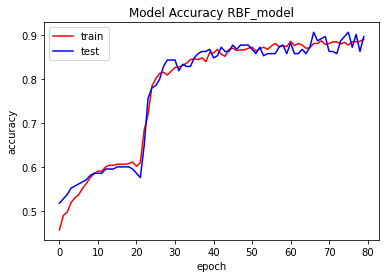

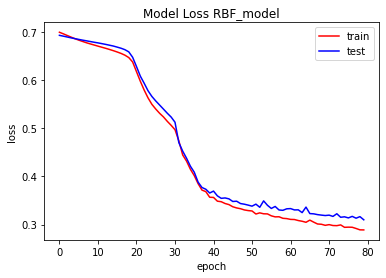

Model Summary
Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (None, 13)                0         
_________________________________________________________________
rbf_layer_50 (RBFLayer)      (None, 100)               1400      
_________________________________________________________________
foo (Dense)                  (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[ 22  81]
 [  0 102]]
Classification Report


,precision,recall,f1-score,support
0,1.000000,0.213592,0.352000,103.000000
1,0.557377,1.000000,0.715789,102.000000
accuracy,0.604878,0.604878,0.604878,0.604878
macro avg,0.778689,0.606796,0.533895,205.000000
weighted avg,0.779768,0.604878,0.533007,205.000000


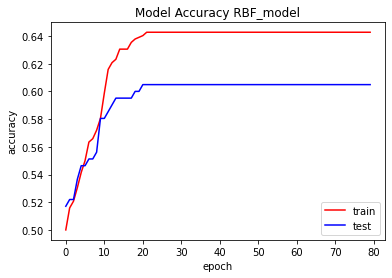

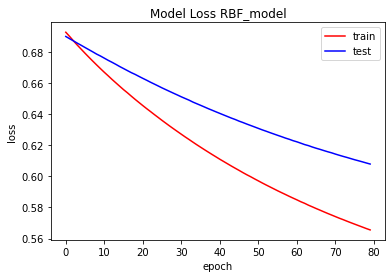

In [257]:
RadialBasisFunction(standardised_x_train,standardised_x_test,y_train,y_test)
RadialBasisFunction(raw_x_train,raw_x_test,y_train,y_test)

In [258]:
def LongShortTermMemory(x_train,x_test,y_train,y_test):
        
    x_train = np.reshape(np.array(raw_x_train), (820,1, 13))
    x_test = np.reshape(np.array(raw_x_test), (205,1, 13))
    y_train = to_categorical(y_train,num_classes=2)
    y_test1 = to_categorical(y_test,num_classes=2)
    LSTM_Model = Sequential()
     
    LSTM_Model.add(LSTM(64,dropout=0.2,recurrent_dropout=0.2, input_shape = (1,13)))
    #LSTM_Model.add(Dense(14,activation='relu'))
    LSTM_Model.add(Dense(2,activation='softmax'))

    LSTM_Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

    history = LSTM_Model.fit(x_train,y_train,batch_size=10,epochs=150,verbose = False, validation_data=(x_test,y_test1))

    result = LSTM_Model.predict_classes(x_test)
    print("Model Summary")
    print(LSTM_Model.summary())
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,result))
    display(pd.DataFrame(classification_report(y_test,result,output_dict=True)).transpose())
    plotTrainHistory(history,'LSTM_Model')

C:\Users\jobis\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model Summary
Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 64)                19968     
_________________________________________________________________
dense_207 (Dense)            (None, 2)                 130       
Total params: 20,098
Trainable params: 20,098
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[92 11]
 [30 72]]


,precision,recall,f1-score,support
0,0.754098,0.893204,0.817778,103.0
1,0.867470,0.705882,0.778378,102.0
accuracy,0.800000,0.800000,0.800000,0.8
macro avg,0.810784,0.799543,0.798078,205.0
weighted avg,0.810508,0.800000,0.798174,205.0


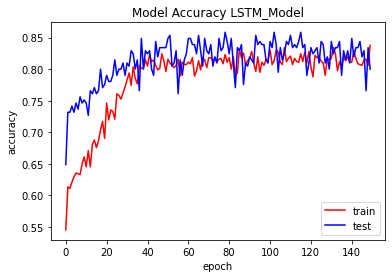

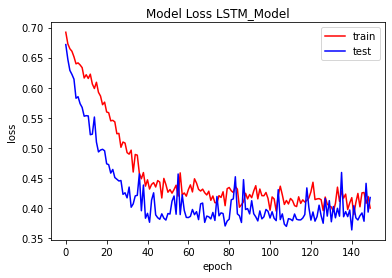

C:\Users\jobis\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model Summary
Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 64)                19968     
_________________________________________________________________
dense_208 (Dense)            (None, 2)                 130       
Total params: 20,098
Trainable params: 20,098
Non-trainable params: 0
_________________________________________________________________
None
Confusion Matrix
[[73 30]
 [ 8 94]]


,precision,recall,f1-score,support
0,0.901235,0.708738,0.793478,103.000000
1,0.758065,0.921569,0.831858,102.000000
accuracy,0.814634,0.814634,0.814634,0.814634
macro avg,0.829650,0.815153,0.812668,205.000000
weighted avg,0.829999,0.814634,0.812575,205.000000


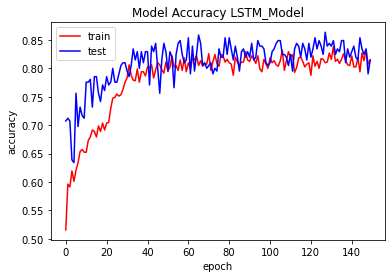

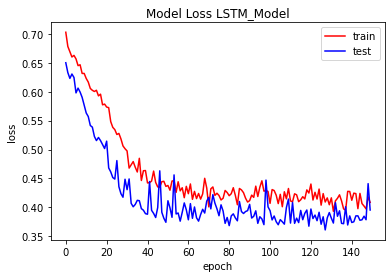

In [259]:
LongShortTermMemory(standardised_x_train,standardised_x_test,y_train,y_test)
LongShortTermMemory(raw_x_train,raw_x_test,y_train,y_test)